<br />

<div>
<font size="6">２０１７年度オープンキャンパス　人間情報工学コース　橋本研究室</font>
<br>
<br>
<font size="6">Graphillion Demo</font>

</div>
<br />
<div style="text-align: right;">
<font size="4"></font>
</div>

<br />

In [61]:
from pandas import DataFrame
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspace
from graphillion import GraphSet

%matplotlib inline

mpl.rcParams['font.family'] = 'Source Han Code JP'
# mpl.rcParams['axes.titlesize'] = 6

In [54]:
def draw(G, pos, subgraph=None, node_size=1200, font_size=10):
    nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color="w")
    nx.draw_networkx_labels(G, pos, font_family="Source Han Code JP", font_size=font_size)
    nx.draw_networkx_edges(G, pos)
    if subgraph:
        subgraph = nx.Graph(data=subgraph)
        nx.draw_networkx_nodes(subgraph, pos, node_size=node_size, node_color="r")
        nx.draw_networkx_edges(subgraph, pos, edgelist=subgraph.edges(), edge_color="r", width=3.0)
    plt.xticks([])
    plt.yticks([])

In [20]:
Akita = pd.read_csv("resources/akita_cities_coordinates.csv")
Akita

,index,city,latitude,longitude
0,0,鹿角,40.215778,140.788436
1,1,大館,40.271405,140.564285
2,2,北秋田,40.226054,140.370742
3,3,能代,40.212151,140.026624
4,4,秋田,39.719922,140.103570
5,5,男鹿,39.886818,139.847558
6,6,潟上,39.857288,140.013054
7,7,由利本荘,39.385877,140.048791
8,8,にかほ,39.203012,139.907713
9,9,大仙,39.453088,140.475448


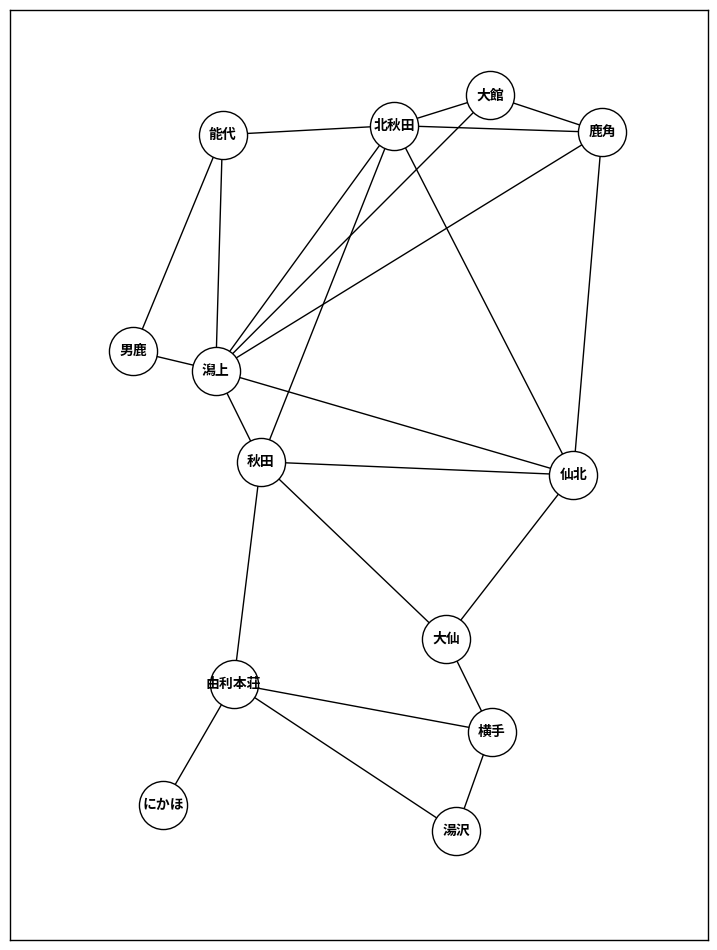

In [62]:
edges = [("鹿角", "大館"), ("鹿角", "北秋田"), ("鹿角", "潟上"), ("鹿角", "仙北"),
         ("大館", "北秋田"), ("大館", "潟上"),
         ("北秋田", "能代"), ("北秋田", "秋田"), ("北秋田", "潟上"), ("北秋田", "仙北"),
         ("能代", "男鹿"), ("能代", "潟上"),
         ("秋田", "潟上"), ("秋田", "由利本荘"), ("秋田", "大仙"), ("秋田", "仙北"),
         ("男鹿", "潟上"),
         ("潟上", "仙北"),
         ("由利本荘", "にかほ"), ("由利本荘", "横手"), ("由利本荘", "湯沢"),
         ("大仙", "仙北"), ("大仙", "横手"),
         ("横手", "湯沢")]

coordinates = zip(Akita["longitude"], Akita["latitude"])
pos = {city: coordinate for city,coordinate in zip(Akita["city"], coordinates)}

G = nx.Graph(data=edges)

plt.figure(figsize=(9,12))
draw(G, pos)
plt.xticks([])
plt.yticks([])
plt.show()

In [63]:
GraphSet.set_universe(edges)

In [64]:
paths_akita_yokote = GraphSet.paths("秋田", "横手")
print("秋田-横手 経路総数: ", len(paths_akita_yokote))

秋田-横手 経路総数:  38


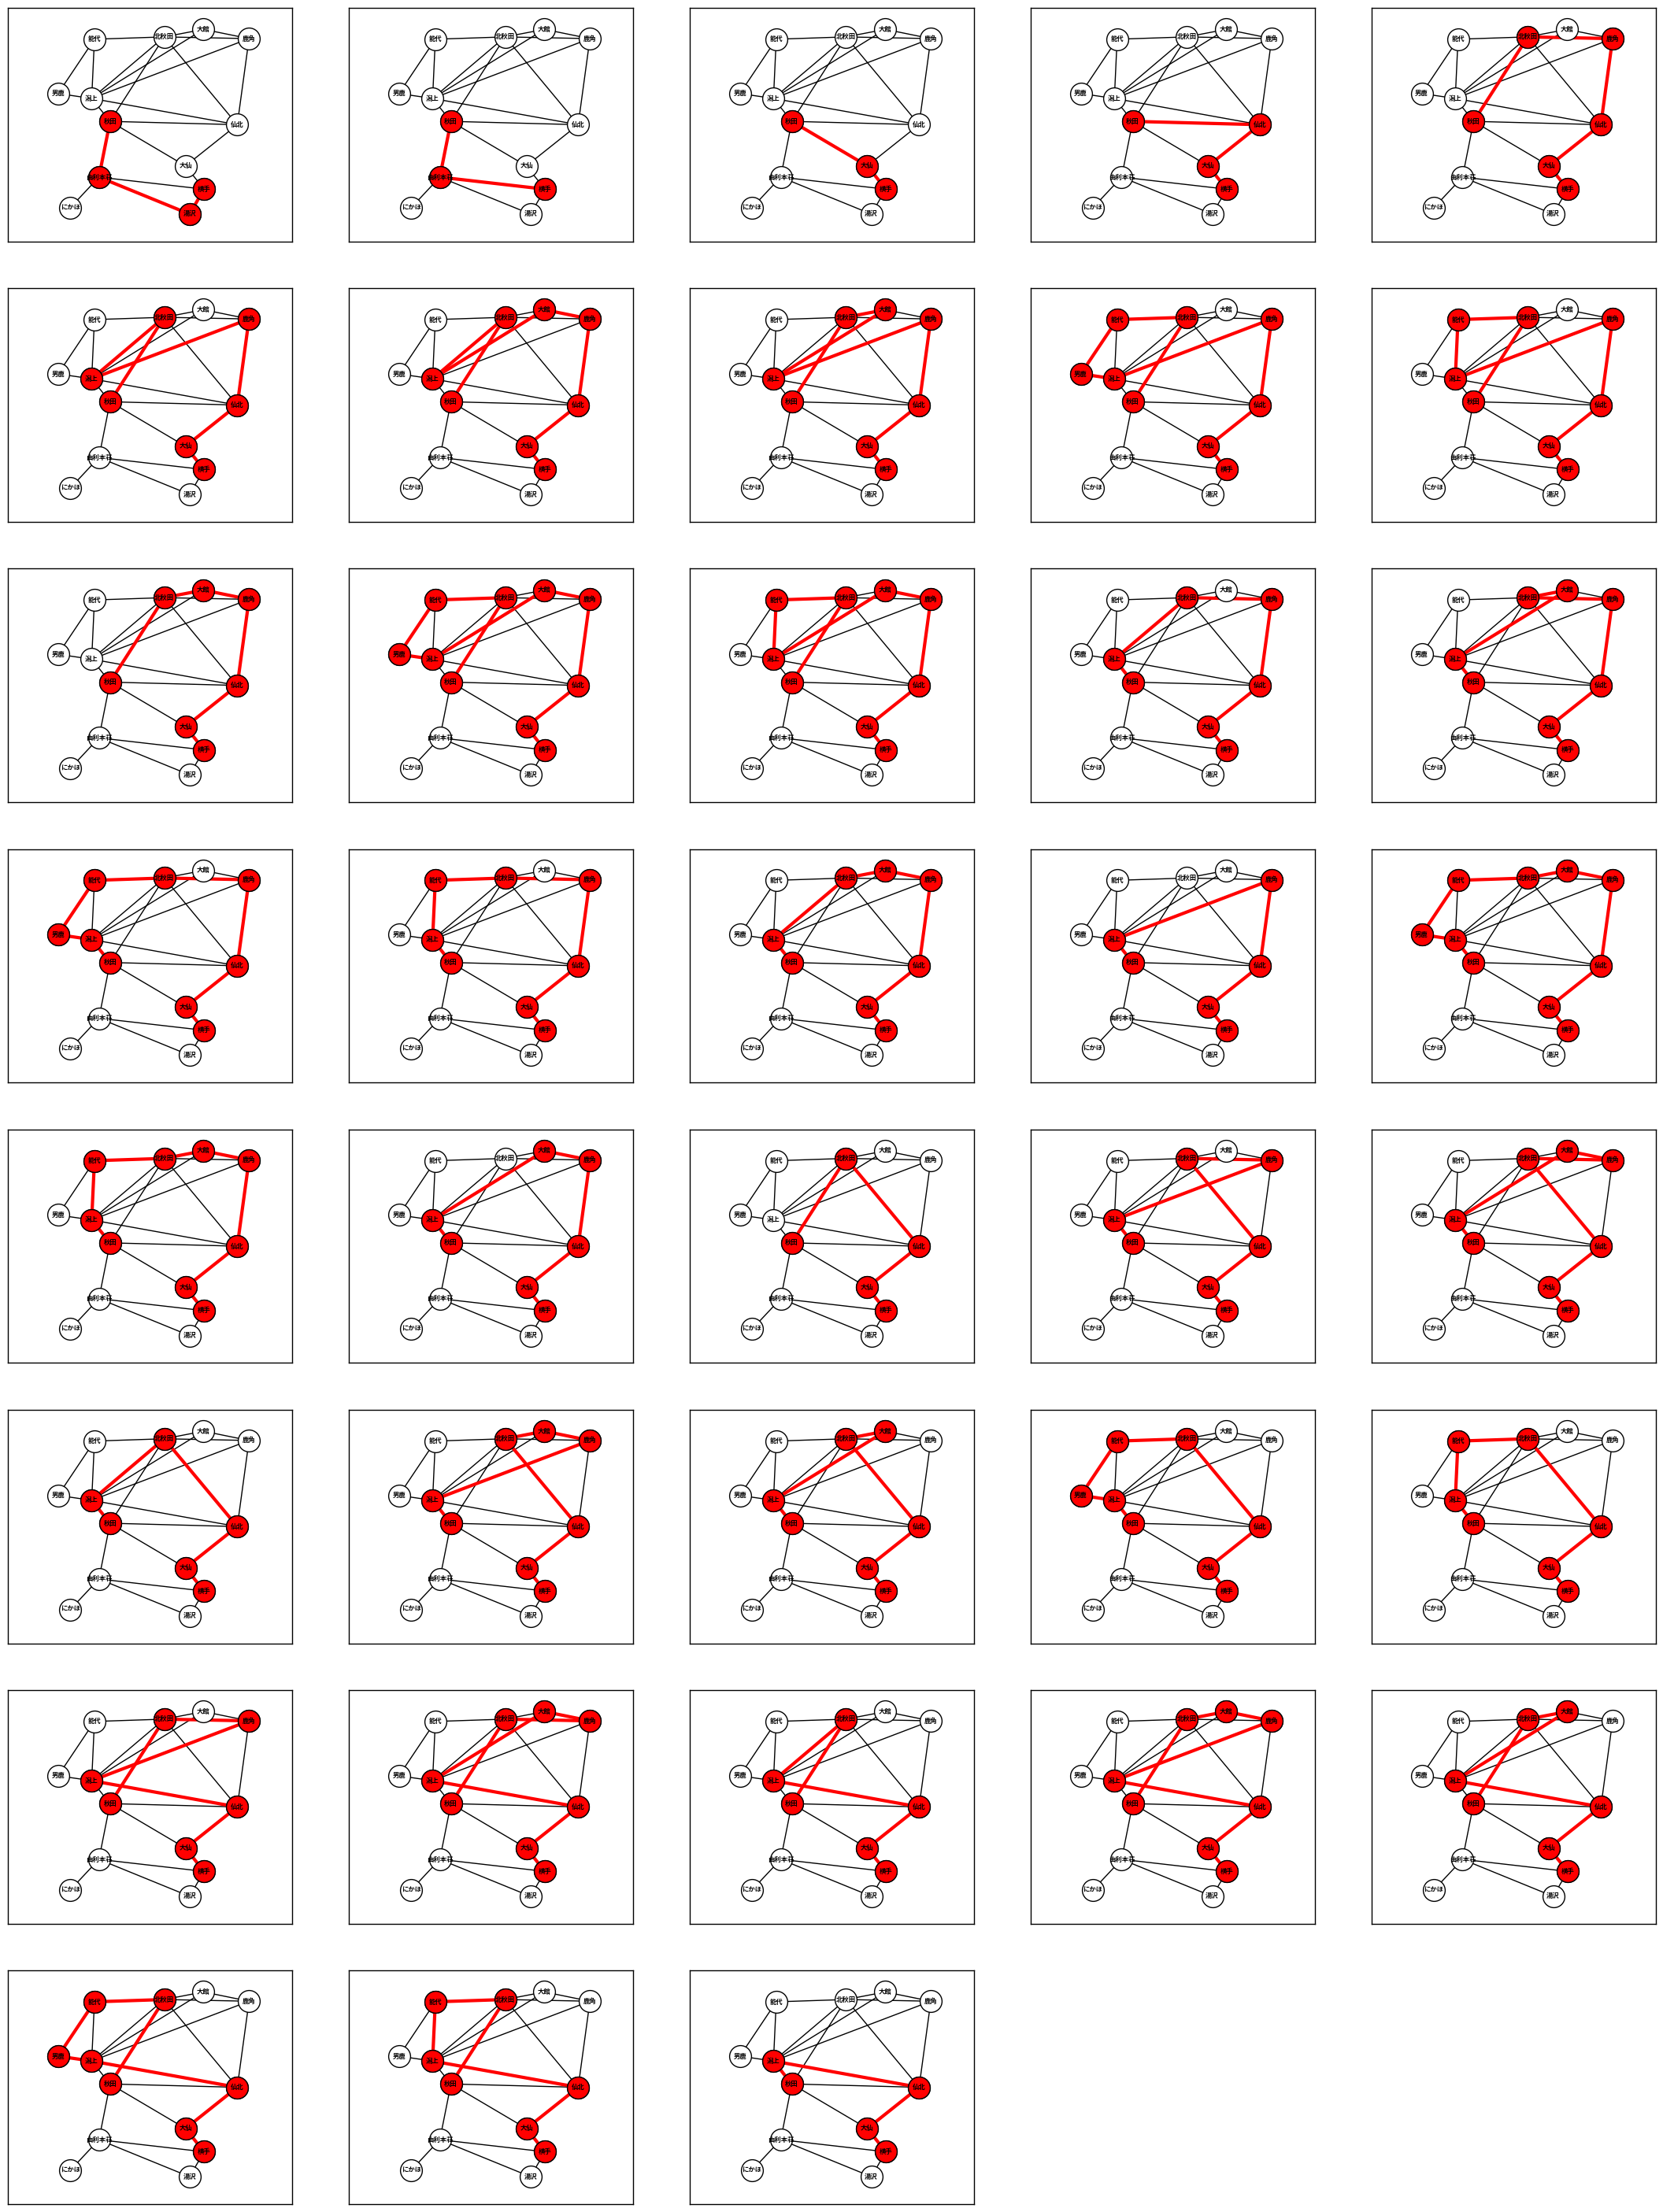

In [66]:
plt.figure(figsize=(27, 36))
for i,path in enumerate(paths_akita_yokote):
    plt.subplot(8, 5, 1+i)
    draw(G, pos, subgraph=path, node_size=400, font_size=6)
    plt.xticks([])
    plt.yticks([])

In [68]:
# all_paths_akita_yokote = [{"path": path} for path in paths_akita_yokote]
DataFrame([{"path": path} for path in paths_akita_yokote])

,path
0,"[(横手, 湯沢), (由利本荘, 湯沢), (秋田, 由利本荘)]"
1,"[(由利本荘, 横手), (秋田, 由利本荘)]"
2,"[(大仙, 横手), (秋田, 大仙)]"
3,"[(大仙, 仙北), (大仙, 横手), (秋田, 仙北)]"
4,"[(北秋田, 秋田), (大仙, 仙北), (大仙, 横手), (鹿角, 仙北), (鹿角,..."
5,"[(北秋田, 潟上), (北秋田, 秋田), (大仙, 仙北), (大仙, 横手), (鹿角..."
6,"[(北秋田, 潟上), (北秋田, 秋田), (大仙, 仙北), (大仙, 横手), (大館..."
7,"[(北秋田, 秋田), (大仙, 仙北), (大仙, 横手), (大館, 北秋田), (大館..."
8,"[(北秋田, 秋田), (北秋田, 能代), (大仙, 仙北), (大仙, 横手), (男鹿..."
9,"[(北秋田, 秋田), (北秋田, 能代), (大仙, 仙北), (大仙, 横手), (能代..."
